# Chapter 1 -- Introduction

In this chapter we introduce the basic notation used throughout this course for representing ultrafast pulses in the time- and frequency-domains.  We also use a few example calculations demonstrate basic principles of ultrafast pulse formation and manipulation in the time and frequency domains.  

Summary of topics:

 - Introduction to the course
 - Notation
 - Quantifying ultrafast pulses
 - Time-frequency relations
 - Core principles of ultrafast pulse formation

## Materials and Notes

See Chs. 1 (1.1) & 2 (2.6) of [Ultrafast Optics text from Franz Kaertner](https://ocw.mit.edu/courses/6-977-ultrafast-optics-spring-2005/f806ff596f9bffb74003360e2c05c086_MIT6_977S05_textbook.pdf).

Materials this chapter are [here](https://drive.google.com/drive/folders/1C-4zoXqnsd4pD6X50eoQbLuNZxPOV-st?usp=share_link). (Includes any notes, videos, papers, or other documents).  

## Simulation and Computation

Simulation and computational examples for this chapter follow.

### Packages, Functions and Variables

The following code-block contains the packages, functions and variables needed for the code found later in this notebook.  It must be run first.  Note that if you are running this on your personal computer, you should ensure that all packages needed are installed first (for example the [numpy](https://numpy.org/), [scipy](https://scipy.org/), and [matplotlib](https://matplotlib.org/) packages must be installed on your computer along with others).  You can find a launcher link at the top to conveniently run this notebook in Google Colab.  

The code below is hidden by default, but you are encouraged to expand it and study it.  The functions and constants will update as needed during the progression of the course, so you should note what new functions have been and added and study how they work.  

The idea is that by the end of this course, you have a collection of basic python scripts to build off of in your future ultrafafst explorations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

### Visualizing Pulse Formation

This is a classic but useful demonstration of the formation of pulses with increasing bandwidth by adding harmonic orders.  We will come back to this in later chapters.  

What we will study:
 - How in-phase harmonics added together result in compressed pulse trains.
 - Increased number of harmonics lead to shorter pulses.
 - Random sinusoidal phases lead random output waveforms in time that are not repeatable (*i.e.* not well-defined pulses)
 - A quadratic phase profile results in broader pulses.
 
The first example that we will study is the case of a summation of 2 sinusoides each having zero phase.  

Text(0, 0.5, '|A(t)|^2')

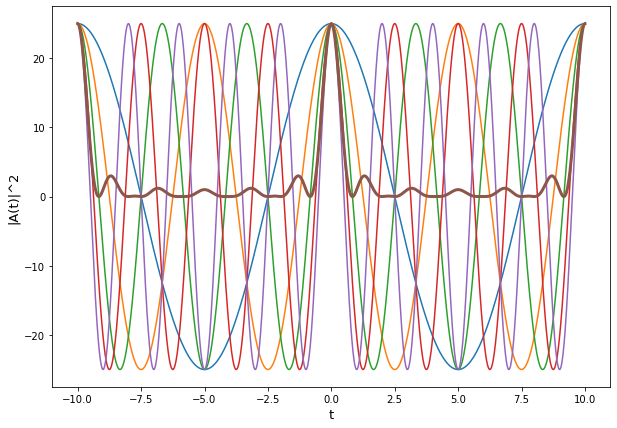

In [2]:
# -- Settings --
t = np.linspace(-10, 10, 2000) #Time axis
T = 10 #Period of first harmonic
N = 5 #Number of harmonic orders
phi = np.zeros(N) #Phase profiles
#phi = 2*np.pi*np.random.rand(N)
#phi = 2*np.pi*(np.arange(1, N+1)/N)**2

#-- Code --
w_0 = 2*np.pi/T #central frequency
A = np.zeros(t.shape) #initialize envelope

fig = plt.figure()
fig.set_size_inches(10, 7)

#Add each harmonic together up to N
for n in range(1, N+1):
    plt.plot(t, 25*np.cos(w_0*n*t + phi[n-1]))
    A = A + np.cos(w_0*n*t + phi[n-1])
  



plt.plot(t, abs(A)**2, linewidth=3)
plt.xlabel('t', fontsize=13)
plt.ylabel('|A(t)|^2', fontsize=13)
  

Now 10 sinusoids.

Text(0, 0.5, '|A(t)|^2')

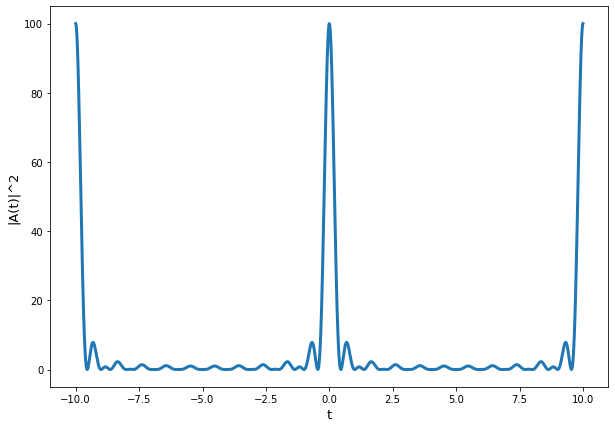

In [3]:
# -- Settings --
t = np.linspace(-10, 10, 2000) #Time axis
T = 10 #Period of first harmonic
N = 10 #Number of harmonic orders
phi = np.zeros(N) #Phase profiles
#phi = 2*np.pi*np.random.rand(N)
#phi = 2*np.pi*(np.arange(1, N+1)/N)**2

#-- Code --
w_0 = 2*np.pi/T #central frequency
A = np.zeros(t.shape) #initialize envelope

#Add each harmonic together up to N
for n in range(1, N+1):

    A = A + np.cos(w_0*n*t + phi[n-1])
  


fig = plt.figure()
fig.set_size_inches(10, 7)
plt.plot(t, abs(A)**2, linewidth=3)
plt.xlabel('t', fontsize=13)
plt.ylabel('|A(t)|^2', fontsize=13)
  

Now 20 sinusoids. 

Text(0, 0.5, '|A(t)|^2')

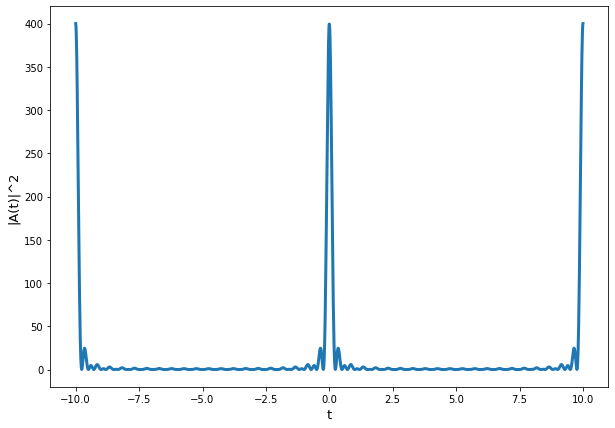

In [4]:
# -- Settings --
t = np.linspace(-10, 10, 2000) #Time axis
T = 10 #Period of first harmonic
N = 20 #Number of harmonic orders
phi = np.zeros(N) #Phase profiles
#phi = 2*np.pi*np.random.rand(N)
#phi = 2*np.pi*(np.arange(1, N+1)/N)**2

#-- Code --
w_0 = 2*np.pi/T #central frequency
A = np.zeros(t.shape) #initialize envelope

#Add each harmonic together up to N
for n in range(1, N+1):

    A = A + np.cos(w_0*n*t + phi[n-1])
  


fig = plt.figure()
fig.set_size_inches(10, 7)
plt.plot(t, abs(A)**2, linewidth=3)
plt.xlabel('t', fontsize=13)
plt.ylabel('|A(t)|^2', fontsize=13)
  

So long as the phases are all locked together, the more harmonic orders that are present, the shorter the resultant pulses are in time.  This is a general trend -- the broader the bandwidth the shorte the pulse that *can* be created.  However, this is not necessarily true and depends sensitively on the phase relationship between each wavelength component of the pulse.  

Now we see what happens if the phases are random.

Text(0, 0.5, '|A(t)|^2')

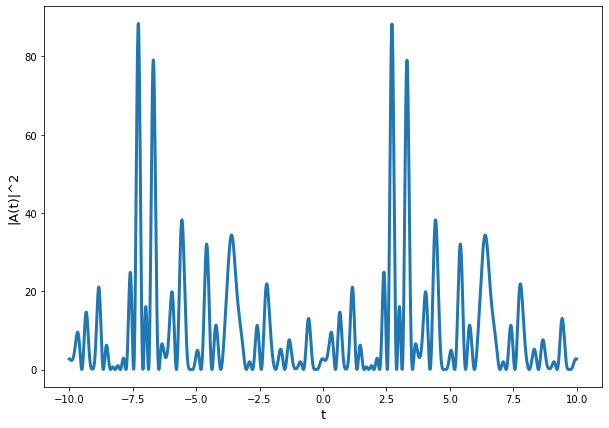

In [5]:
# -- Settings --
t = np.linspace(-10, 10, 2000) #Time axis
T = 10 #Period of first harmonic
N = 20 #Number of harmonic orders
#phi = np.zeros(N) #Phase profiles
phi = 2*np.pi*np.random.rand(N)
#phi = 2*np.pi*(np.arange(1, N+1)/N)**2

#-- Code --
w_0 = 2*np.pi/T #central frequency
A = np.zeros(t.shape) #initialize envelope

#Add each harmonic together up to N
for n in range(1, N+1):

    A = A + np.cos(w_0*n*t + phi[n-1])
  


fig = plt.figure()
fig.set_size_inches(10, 7)
plt.plot(t, abs(A)**2, linewidth=3)
plt.xlabel('t', fontsize=13)
plt.ylabel('|A(t)|^2', fontsize=13)
  

The time-domain profile is now random.  It has the same time-averaged power, but i snot repeatable.  

Now for a quadratic phase profile.  

Text(0, 0.5, '|A(t)|^2')

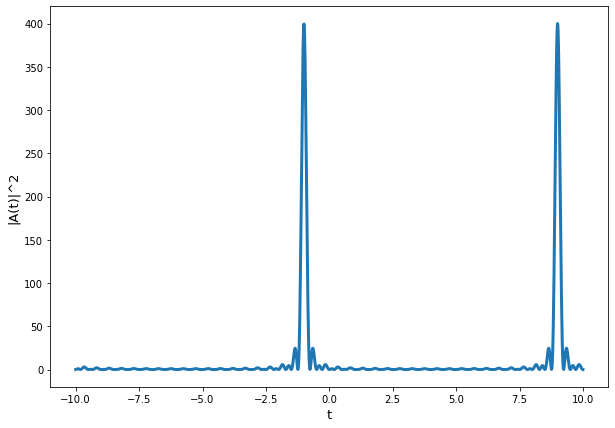

In [6]:
# -- Settings --
t = np.linspace(-10, 10, 2000) #Time axis
T = 10 #Period of first harmonic
N = 20 #Number of harmonic orders
#phi = np.zeros(N) #Phase profiles
#phcvi = 2*np.pi*np.random.rand(N)
phi = 2*np.pi*2*(np.arange(1, N+1)/N)**1

#-- Code --
w_0 = 2*np.pi/T #central frequency
A = np.zeros(t.shape) #initialize envelope

#Add each harmonic together up to N
for n in range(1, N+1):

    A = A + np.cos(w_0*n*t + phi[n-1])
  


fig = plt.figure()
fig.set_size_inches(10, 7)
plt.plot(t, abs(A)**2, linewidth=3)
plt.xlabel('t', fontsize=13)
plt.ylabel('|A(t)|^2', fontsize=13)
  

Note that the pulses are still repeatable and well-defined, only now broader in time.  You will see this trend over and over.  Phase shifts as a funciton of wavelength lead to broadened/stretched pulses in time.  

### Top-Hat Pulse and Dispersion

Here we will create a simple top-hat pulse. We will:
 
 - visualize the formation of sinc-lobes in the frequency-domain
 - look at time-bandwidth relations
 - look at the impact of GDD
 
This will require us to introduce the numerical Fourier transform, specifically the discrete Fourier transform.  We will use such discrete Fourier transforms thorughout this book.  

First, we need to create the top-hat pulse.  

Text(0, 0.5, 'A(t)')

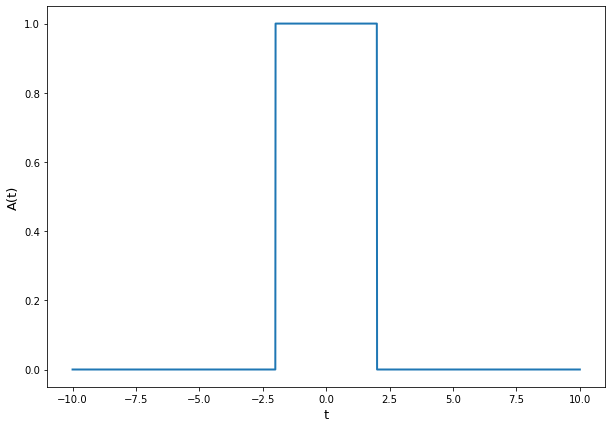

In [7]:
# -- Settings -- 
t = np.linspace(-10, 10, 2000); #time axis
T = 4; #Width of rectangular pulse
A0 = 1; #Peak value of pulse

# -- Code -- 

#Define the envelope
A = A0*(t >= -T/2)&(t <= T/2);

fig = plt.figure()
fig.set_size_inches(10, 7)
plt.plot(t, A, linewidth=2)
#set(gca, 'fontsize', 13)
plt.xlabel('t', fontsize=13)
plt.ylabel('A(t)', fontsize=13)

We now need to take the Fourier transform to examine the pulse in the frequency domain.  We draw two reference lines at $\pm 2\pi/T$ where $T$ is the width of top-hat pulse.  This demonstrates the time-frequency relationship bewteen the top-hat in the time-domain, and the main lobe in the frquency domain.  Note, however, there are extended "sinc" lobes present in the frequency-domain.  

Text(0, 0.5, '$A_f(\\omega)$')

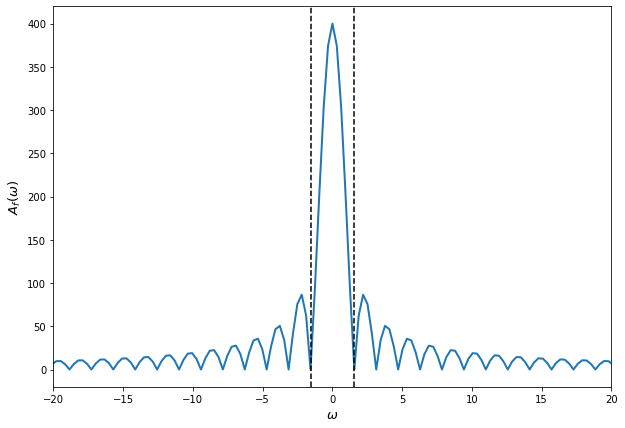

In [8]:
A_f = np.fft.fftshift(np.fft.fft(A));
dw = 2*np.pi/(t[-1] - t[0]);
w = dw*np.fft.fftshift(np.append(np.arange(0, t.size/2), np.arange(-1*t.size/2, 0)))

fig = plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(1, 1, 1)
ax.plot(w, np.abs(A_f), linewidth=2)
ax.axvline(-2*np.pi/T, linestyle='--', color='black')
ax.axvline(2*np.pi/T, linestyle='--', color='black')
ax.set_xlim([-20, 20])
ax.set_xlabel('$\omega$', fontsize=13)
ax.set_ylabel('$A_f(\omega)$', fontsize=13)

We can also now add in group delay dispersion (GDD) by adding in a quadratic phase profile in freuqency.  Note, as with the harmonic analysis above, this broadens the pulse. 

Text(0, 0.5, 'A(t)')

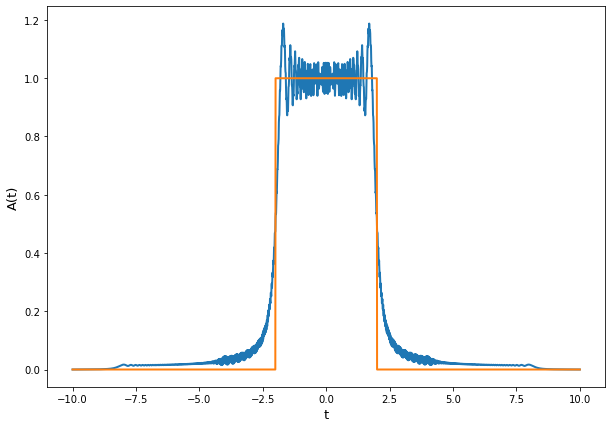

In [9]:
phi_2 = 1e-2;

#Apply GDD
A_f_prime = A_f*np.exp(1j*phi_2*w**2);

#Bring back to time
A_prime = np.fft.ifft(np.fft.fftshift(A_f_prime));

fig = plt.figure()
fig.set_size_inches(10, 7)
#plt.plot(t, np.abs(A), linewidth = 2)
plt.plot(t, np.abs(A_prime), linewidth=2)
plt.plot(t, np.abs(A), linewidth=2)
plt.xlabel('t', fontsize=13)
plt.ylabel('A''(t)', fontsize=13)